# PCA、SVD 及其在影像處理的應用、影像（臉部）特徵的實驗
# 作品目標 : 
## 以著名影像處理的Lenna做實驗，將資料壓縮且依不同的 patch size 切割並重組、數字影像的壓縮與生成、以及人臉和非人臉加密解密效果，還有用人臉加密非人臉影像的可行性，觀察上述這些壓縮後的品質以及其背後可能的因素

<hr>

## 一、
## 將一張圖像 X 利用 SVD 的 “Rank q approximation”，達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation”，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？能說出理由嗎？

## (1) X 不變

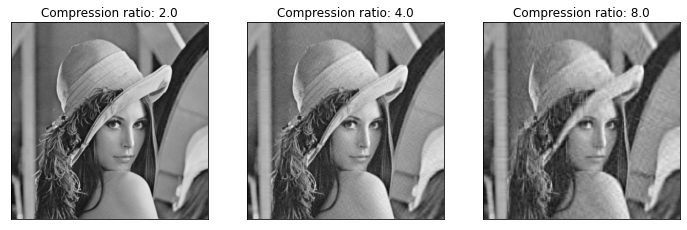

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgfile = "lenna.png" # 512x512x3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape
U, E, VT = svd(X, full_matrices=False)
q = np.array([p/4, p/8, p/16]).astype('int') #q為128,64,32
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray') #繪製照片
    ax[i].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

## (2) 將 X 以 $8\times 8$ 小圖（patch）進行切割，再將每個小圖拉成 $64\times 1$ 的向量，最後重組這些向量並排成新的 $64\times N$ 矩陣。

In [2]:
#切割圖
def reshape_graph(X,patch_size):
    N, p = X.shape
    p_patch = patch_size**2
    N_patch = int(N*p/p_patch)
    M = np.zeros((N_patch,patch_size**2))
    for i in range(int(N/patch_size)):
        for j in range(int(p/patch_size)):
            M[i*p//patch_size+j,:] = X[i*patch_size:(i+1)*patch_size,j*patch_size:(j+1)*patch_size].reshape(1,-1)
    return M.T

In [3]:
def montage(A, m, n):
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M

In [38]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def reshape_and_reform(patch_size):
    imgfile = "lenna.png" # 512x512x3
    X = mpimg.imread(imgfile)
    if len(X.shape) > 2:
        X = np.mean(X, axis=2) # convert RGB to grayscale

    N, p = X.shape
    X_ = reshape_graph(X,patch_size)
    U, E, VT = svd(X_, full_matrices=False)
    q = np.array([p/4, p/8, p/16]).astype('int')
    fig, ax = plt.subplots(1, 3, figsize=(16, 8))

    for i, r in enumerate(q):
        Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
        Xq_ = montage(Xq,N//patch_size,p//patch_size)
        ax[i].imshow(Xq_, cmap = 'gray') #繪製照片
        ax[i].set_title('Compression ratio: {}'.format(p/r/2))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

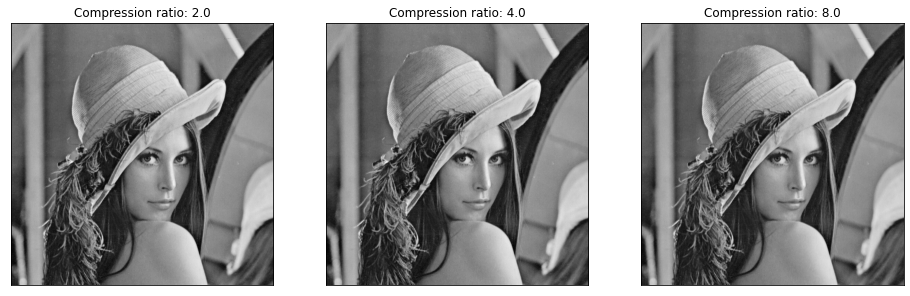

In [39]:
reshape_and_reform(8)

## (3) 同上，小圖大小為 $16\times 16$/per patch。

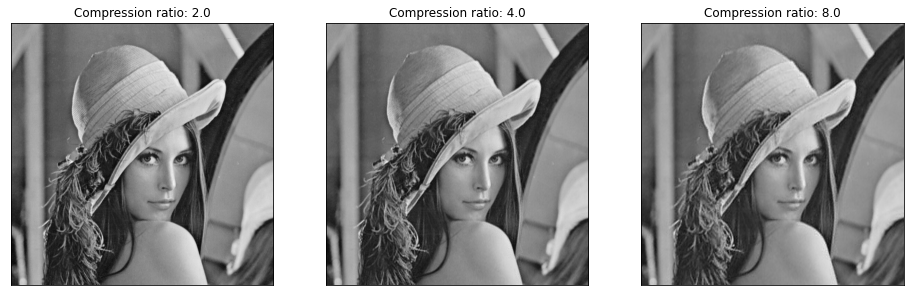

In [40]:
reshape_and_reform(16)

## (4) 同上，但分割成 $32\times 32$/per patch。

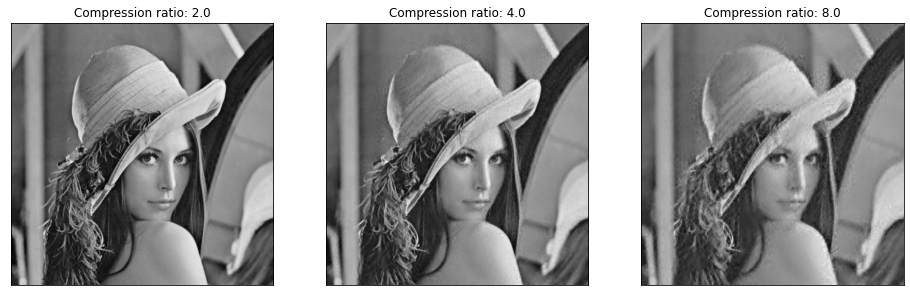

In [41]:
reshape_and_reform(32)

## 比較結果(第一種呈現方式): 
## 每行呈現 --> 同樣的壓縮倍數 q ，呈現不變的 X 、 8X8/per patch 、 16X16/per patch 、 32X32/per patch
## 每列呈現 --> 第一列是 不變的X 、 第二列是 8X8/per patch 、 第三列是 16X16/per patch 、 第四列是 32X32/per patch

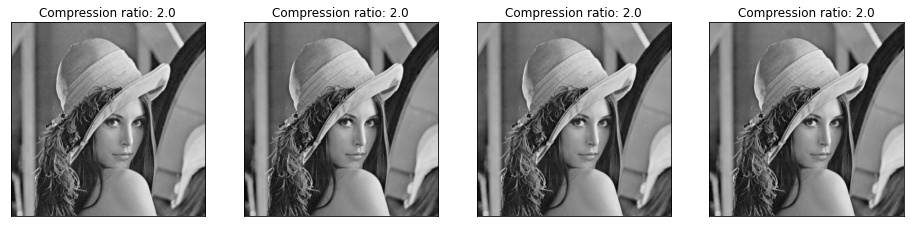

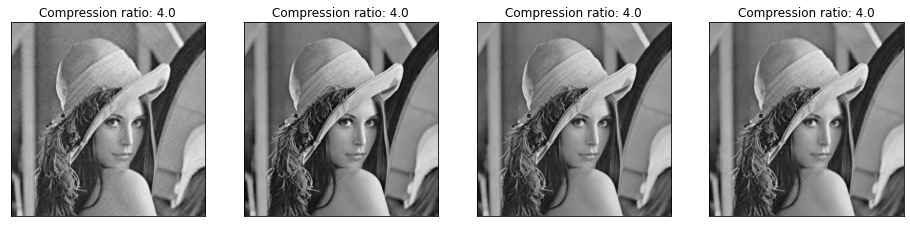

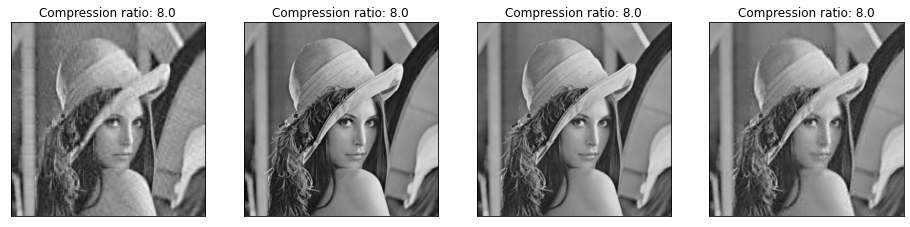

In [23]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgfile = "lenna.png" # 512x512x3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale

N, p = X.shape
q = np.array([p/4, p/8, p/16]).astype('int')
s = np.array([8,16,32])

for i in range((len(q))):
    fig, ax = plt.subplots(1, 4, figsize=(16, 8))
    U, E, VT = svd(X, full_matrices=False)
    Xq = U[:, :q[i]] @ np.diag(E[:q[i]]) @ VT[:q[i], :]
    ax[0].imshow(Xq, cmap = 'gray') #繪製照片
    ax[0].set_title('Compression ratio: {}'.format(p/q[i]/2))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    for j,r in enumerate(s):
        X1_ = reshape_graph(X,r)
        U1, E1, VT1 = svd(X1_, full_matrices=False)
        Xq1 = U1[:, :q[i]] @ np.diag(E1[:q[i]]) @ VT1[:q[i], :]
        Xq1_ = montage(Xq1,int(N//r),int(p//r))
        ax[j+1].imshow(Xq1_, cmap = 'gray') #繪製照片
        ax[j+1].set_title('Compression ratio: {}'.format(p/q[i]/2))
        ax[j+1].set_xticks([])
        ax[j+1].set_yticks([])
    plt.show()    

## 比較結果(第二種呈現方式): 
## 每行呈現 --> 不變的 X 、 8X8/per patch 、 16X16/per patch 、 32X32/per patch， 其中各自不同的壓縮倍數的影像

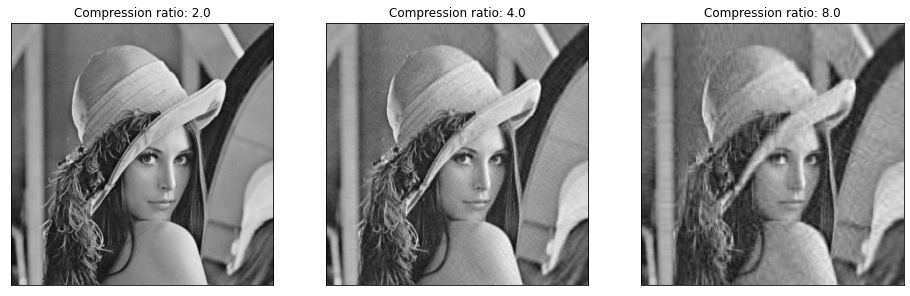

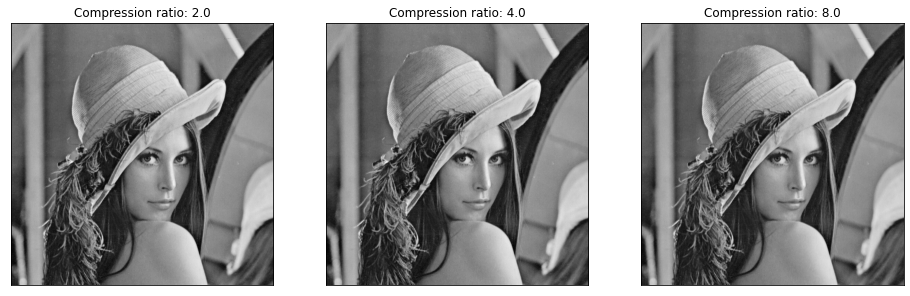

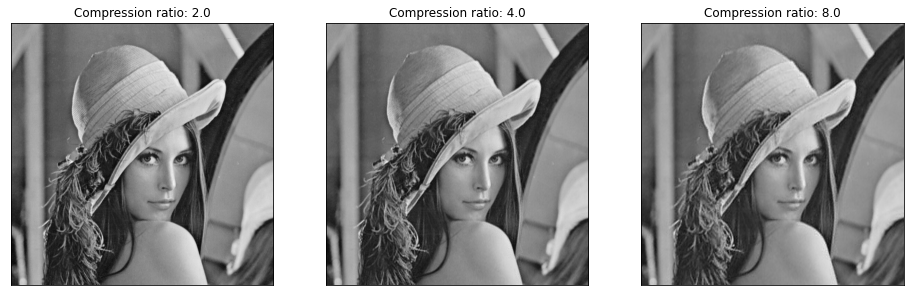

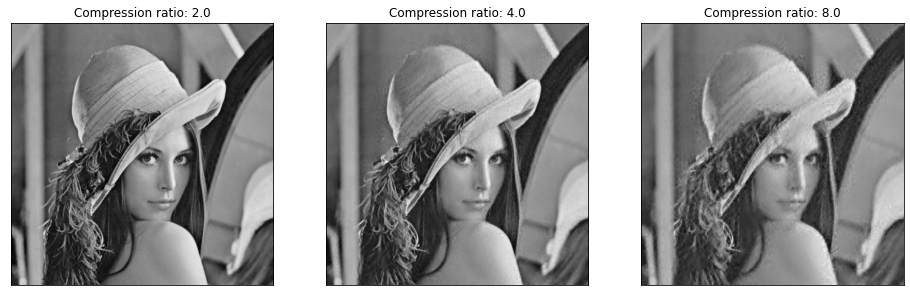

In [37]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgfile = "lenna.png" # 512x512x3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale

N, p = X.shape
q = np.array([p/4, p/8, p/16]).astype('int')
s = np.array([8,16,32])

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
U, E, VT = svd(X, full_matrices=False)
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray') #繪製照片
    ax[i].set_title('Compression ratio: {}'.format(p/q[i]/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()
for j in range(len(s)):
    reshape_and_reform(s[j])

## 結論:
### 1.可以觀察到 X 不變的情況下，壓縮倍數越高，反而 Lenna 較其他張切割過再組回的圖還要更加模糊
### 2. X 切割成 8X8 /per patch 再組回的 Lenna 較16X16 /per patch 和 32X32 /per patch 更能仔細觀察到細微的部分，Lenna的五官輪廓較為清晰
### 3.所以 patch size = 8 比較能捕捉到圖片的局部細節，而 patch size 較大的話能保留圖像的全局結構

<hr>

## 二、
## 以 70000 張手寫圖像為例，每個數字約 7000 字，寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像。

In [141]:
def montage(A, m, n):
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M

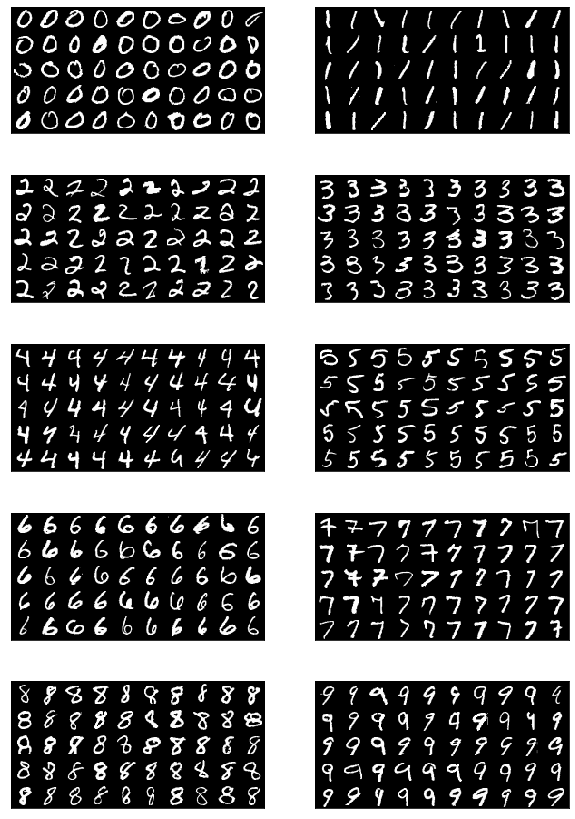

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mnist = loadmat("mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]

fig, ax = plt.subplots(5, 2, figsize=(10, 15))
ax = ax.flatten()

for i in range(5*2):
    indices = np.where(y == i)[0]
    selected_idx = np.random.choice(indices, size=50, replace=False)
    selected_images = X[:,selected_idx]
    montage_image = montage(selected_images, 5, 10)
    ax[i].imshow(montage_image, cmap = 'gray', interpolation = 'nearest')
    # axs[i].axis('off')  
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

## 結論:
### 處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態，上述的程式碼能每次隨機觀察不同的手寫數字影像

<hr>

## 三、
## 每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 q 的選擇可以根據 $\sigma_1, \sigma_2, \cdots,  \sigma_r$ 的「能量配置」來決定，或說決定 q 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。

In [143]:
def montage(A, m, n):
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M

In [160]:
mnist = loadmat("mnist-original.mat")
X = mnist["data"]
U, E, VT = svd(X, full_matrices = False)
singular = E.cumsum()/E.sum()*100

def show(size,q):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io import loadmat
    #original
    mnist = loadmat("mnist-original.mat")
    X = mnist["data"]
    N, p = X.shape
    idx = np.random.choice(np.arange(70000), size=size, replace=False)
    img = X[:,idx]
    sz = np.sqrt(len(img)).astype('int')
    fig, ax = plt.subplots(1, 2,figsize = (10,15))
    montage_image = montage(img, 10, 10)
    digit_stored = N*p
    ax[0].imshow(montage_image, cmap = 'gray', interpolation = 'nearest')
    ax[0].set_title('Original image')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    #after
    U, E, VT = svd(montage_image, full_matrices = False)
    Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
    print('主成分的能量佔比: {:.2f}'.format(singular[q]/100))
    ax[1].imshow(Xq, cmap = 'gray', interpolation = 'nearest')
    ax[1].set_title('Compression ratio: {:.1f}'.format((N*p)/(q*(N+p))))
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()


主成分的能量佔比: 0.30


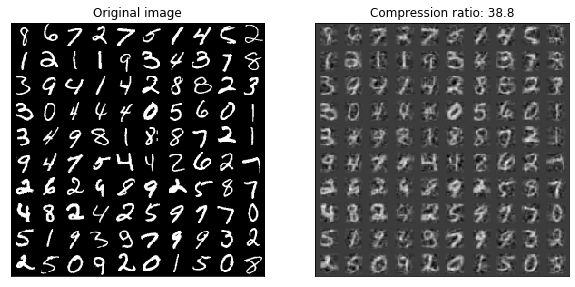

In [161]:
show(100,20)

主成分的能量佔比: 0.41


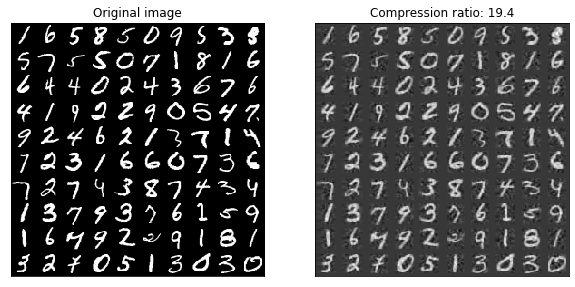

In [162]:
show(100,40)

主成分的能量佔比: 0.53


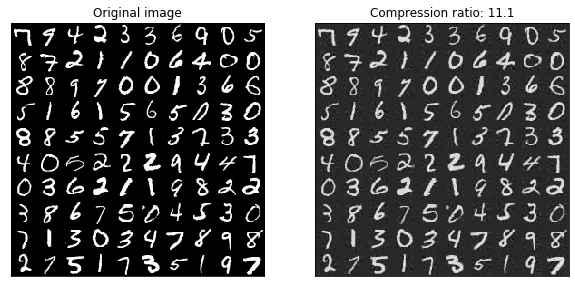

In [163]:
show(100,70)

主成分的能量佔比: 0.80


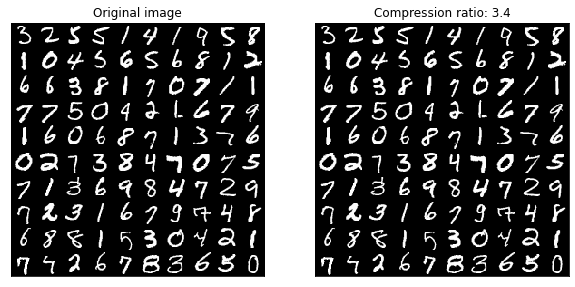

In [164]:
show(100,230)

## 討論:
### 1. 壓縮的好處是方便傳送與保存，缺點是失真的影像品質，不過如能保持一定的清晰程度，仍可被接受。可以看到當q選到20時，幾乎已經看不見數字的輪廓，無法明確判定數字是多少，保留了數字的特徵
### 2. 當q選到50時，數字還是稍微模糊，也保留了數字的特徵，能量占比為41%，已經不錯了
### 3. 當q選到70時，能量占比為53%，已經到達能以肉眼辨識出數字的程度，壓縮占比為11
### 4. 在q=230時，幾乎已經到達和原圖相同的清晰度，主成分的能量佔比為80%

## 四、
## 有 5 張經過加密的影像圖（壓縮檔下載），其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 X 的 SVD，即 X = $U\Sigma V^T$，取 U 作為影像加密的工具，即假設向量 x 代表一張原圖影像，則 $U[:, 0:q]^T$ x 代表該影像的前 q 個主成分，以此作為加密影像。

### 解密五張影像

In [29]:
def show_montage(X, n, m, h, w):
    '''
    X: 影 像 資 料 矩 陣 ， 每 行 代 表 一 張 影 像
    n, m: 每 張 影 像 的 大 小 n x m
    h, w : 建 立 一 個 蒙 太 奇 圖 陣 ， 大小 figsize = (w,h)
    '''
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

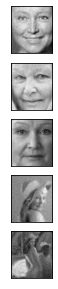

In [30]:
#解密 5 張影像
import pandas as pd
import numpy as np
import scipy.io
from scipy.io import loadmat
from numpy.linalg import svd
import matplotlib.pyplot as plt

df = pd.read_csv('五張加密的影像.csv') 
df_ = np.array(df)
D = scipy.io.loadmat('allFaces.mat')
X = D['faces'] # each column represents an image
m = int(D['m'])
n = int(D['n'])
avgFace = X.mean(axis = 1).reshape(-1,1)
X_avg = X - np.tile(avgFace,(1,X.shape[1]))
U, E, VT = svd(X_avg, full_matrices = False)
q=2000
Xq = U[:,:q] @ df_
show_montage(Xq, n, m ,5, 1)

## 討論:
### 利用加密過後的影像，在左邊乘上 Uq 即可解密，解密出來的五張圖片為老的Lenna